<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis Jorge Ahumada, Bernardo Ramírez González

**Fecha:** 11 de marzo del 2022.

**Expediente** : 728125.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea 4: Clase 10,11

## Enunciado de tarea 
> Descripción de la tarea
>### <font color ='red'> **Tarea 4** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


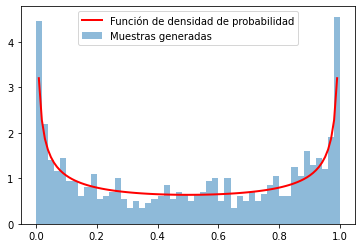

In [14]:
# Código de solución estudiante 1
import numpy as np
import matplotlib.pyplot as plt

# Función de densidad de probabilidad
def f(x):
    return (1/np.pi)*(1/np.sqrt(x*(1-x)))

# Función inversa de la CDF
def invCDF(u):
    return np.sin(np.pi*u/2)**2

# Generación de muestras aleatorias
u = np.random.uniform(size=1000)
x = invCDF(u)

# Histograma de las muestras generadas
plt.hist(x, bins=50, density=True, alpha=0.5, label='Muestras generadas')

# Gráfica de la función de densidad de probabilidad
xs = np.linspace(0.01, 0.99, 100)
plt.plot(xs, f(xs), 'r-', lw=2, label='Función de densidad de probabilidad')

plt.legend()
plt.show()


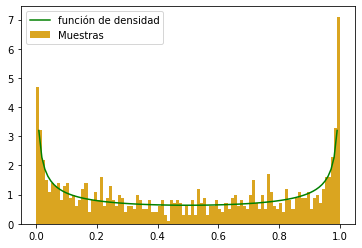

In [20]:
#Código solución estudiante 2

#definimos nuestra función inversa
inv = lambda x: np.sin(np.pi*x/2)**2
#definimos nuestros números aleatorios
n = np.random.uniform(size=1000)
#función de densidad
y = lambda x: 1/(np.pi*(np.sqrt(x*(1-x))))
xs = np.linspace(0.01, 0.99, 100)
plt.hist(inv(n),label='Muestras',color='goldenrod',bins=100, density=True)
plt.plot(xs,y(xs), color='green',label='función de densidad')
plt.legend()



## Enunciado de tarea 
> Descripción de la tarea
### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea 4: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

In [3]:
import random

n = 10
p = 0.7

# Función que calcula la probabilidad p_i utilizando la ecuación recursiva
def p_next(i, p_i):
    return (n - i) / (i + 1) * p / (1 - p) * p_i

# Calculamos la función acumulada de probabilidad
F = [0] * (n + 1)
F[0] = (1 - p) ** n
for i in range(1, n + 1):
    F[i] = F[i-1] + p_next(i-1, F[i-1])

# Generamos una variable aleatoria binomial utilizando la transformada inversa
def binomial():
    u = random.uniform(0, 1)
    for i in range(n + 1):
        if u <= F[i]:
            return i

# Ejemplo de uso: generamos 10 variables aleatorias binomiales y las imprimimos
for i in range(10):
    print(binomial())


6
7
5
6
6
7
7
4
7
7


## Enunciado de tarea 
> Descripción de la tarea

> ## <font color ='red'>Tarea 4
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

In [4]:
import numpy as np

def poisson(lam):
    k = 0
    p = np.exp(-lam)
    u = np.random.uniform()
    while u >= p:
        k += 1
        p *= lam / k
    return k


In [5]:
poisson(1)

0